In [1]:
## Loading samples, store data in dataframe
import pandas as pd
%run data_prep.ipynb

('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


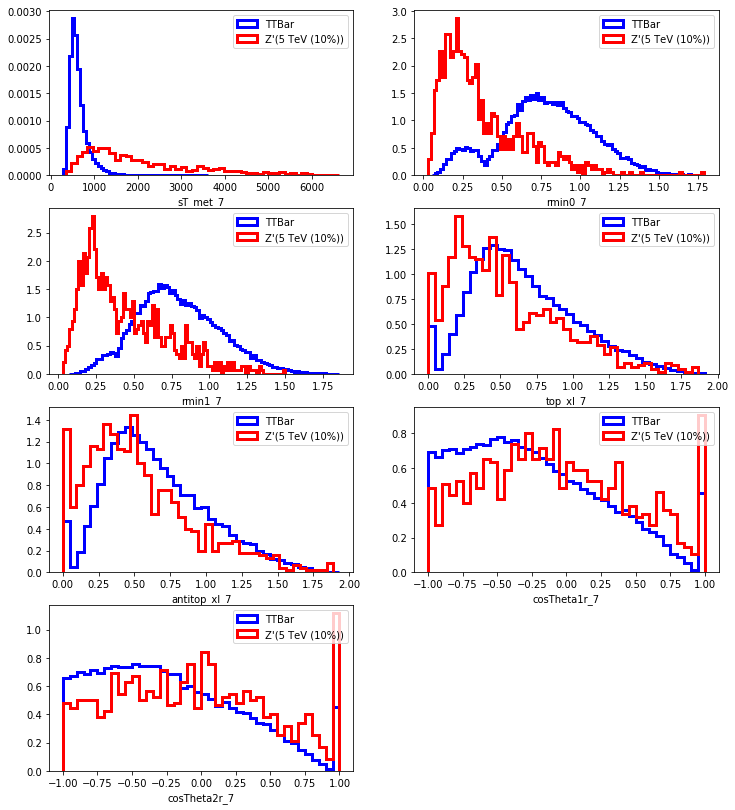

In [2]:
import math
seed = 1234
np.random.seed(seed)

df = {}
VARS = [ 'sT_met_7', 'rmin0_7', 'rmin1_7','top_xl_7','antitop_xl_7','cosTheta1r_7','cosTheta2r_7']
BINS = {'sT_met_7':50, 'rmin0_7':100, 'rmin1_7':100,'top_xl_7':40,'antitop_xl_7':40, 'cosTheta1r_7':40, 'cosTheta2r_7':40,}

for k in filename.keys():
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = df[k][df[k]['sT_met_7'] >=0]

df[('bkg','mm')]['label'] = np.zeros(len(df[('bkg','mm')]))
df[('sig','mm')]['label'] = np.ones(len(df[('sig','mm')]))

    
#print(sorted(df.keys()))    
#print (df[('sig','mm')].iloc[-10:])
#print (df[('bkg','mm')].iloc[-10:])

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    sns.distplot(df[('bkg','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="TTBar", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue"})
    sns.distplot(df[('sig','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="Z'(5 TeV (10%))", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red"})
    ax.legend(loc="upper right")

plt.show()    



In [3]:
## DNN architecture 
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                112       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


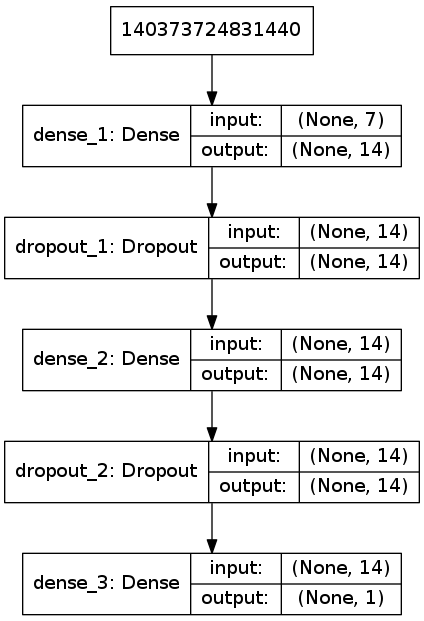

In [4]:
# Case 1: 2 layers, nodes = twice * features

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 14 * (7+1) = 112
# layer 2 : 14 * (14+1) = 210
# output : 1 * (14+1) = 15


NDIM = len(VARS)
print(NDIM)
model_2l_2f = Sequential()

model_2l_2f.add(Dense(NDIM*2, activation = "relu", input_shape=(NDIM, )))
model_2l_2f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_2f.add(Dense(NDIM*2, activation = "relu"))
model_2l_2f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_2f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_2f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_2f.summary()
plot_model(model_2l_2f, to_file='model_2l_2f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_2f_plot.png')

7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                168       
_________________________________________________________________
dropout_3 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 21)                462       
_________________________________________________________________
dropout_4 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 22        
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


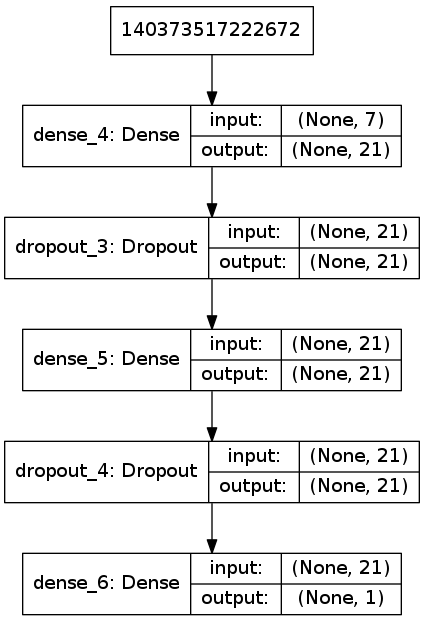

In [5]:
# Case 2: 2 layers, nodes = three * features

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 21 * (7+1) = 168
# layer 2 : 21 * (21+1) = 462
# output : 1 * (21+1) = 22


NDIM = len(VARS)
print(NDIM)
model_2l_3f = Sequential()

model_2l_3f.add(Dense(NDIM*3, activation = "relu", input_shape=(NDIM, )))
model_2l_3f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_3f.add(Dense(NDIM*3, activation = "relu"))
model_2l_3f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_3f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_3f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_3f.summary()
plot_model(model_2l_3f, to_file='model_2l_3f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_3f_plot.png')

7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 28)                224       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 29        
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


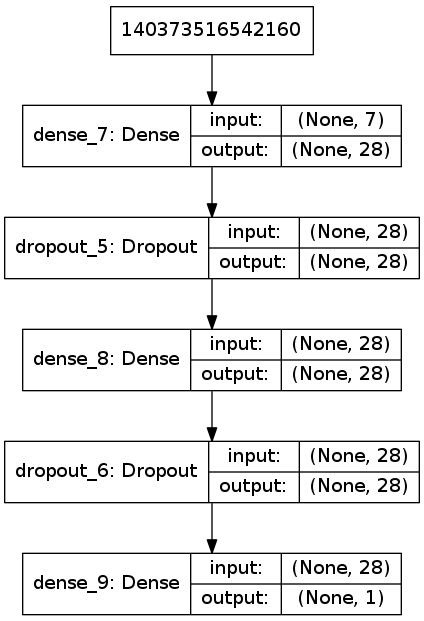

In [6]:
# Case 3: 2 layers, nodes = four* features

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 28 * (7+1) = 224
# layer 2 : 28 * (28+1) = 812
# output : 1 * (28+1) = 29


NDIM = len(VARS)
print(NDIM)
model_2l_4f = Sequential()

model_2l_4f.add(Dense(NDIM*4, activation = "relu", input_shape=(NDIM, )))
model_2l_4f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_4f.add(Dense(NDIM*4, activation = "relu"))
model_2l_4f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_4f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_4f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_4f.summary()
plot_model(model_2l_4f, to_file='model_2l_4f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_4f_plot.png')

In [7]:
#sample n (n=number of signal events) from bkg 
from sklearn.model_selection import train_test_split

df_sampled_bkg = df[('bkg','mm')].sample(n=df[('sig','mm')].shape[0], random_state=1)
df_all = pd.DataFrame([])
df_all = pd.concat([df[('sig','mm')],df_sampled_bkg])
print df[('sig','mm')].shape
print df_sampled_bkg.shape
print df_all.shape

(951, 8)
(951, 8)
(1902, 8)


In [8]:
X = df_all.iloc[:,0:len(VARS)] #Predictors
Y = df_all.iloc[:,len(VARS)]   #Outcomes


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print type(X_test)
print type(X)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0]/float(X_train.shape[0]+X_test.shape[0]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1521, 7)
(381, 7)
0.799684542587


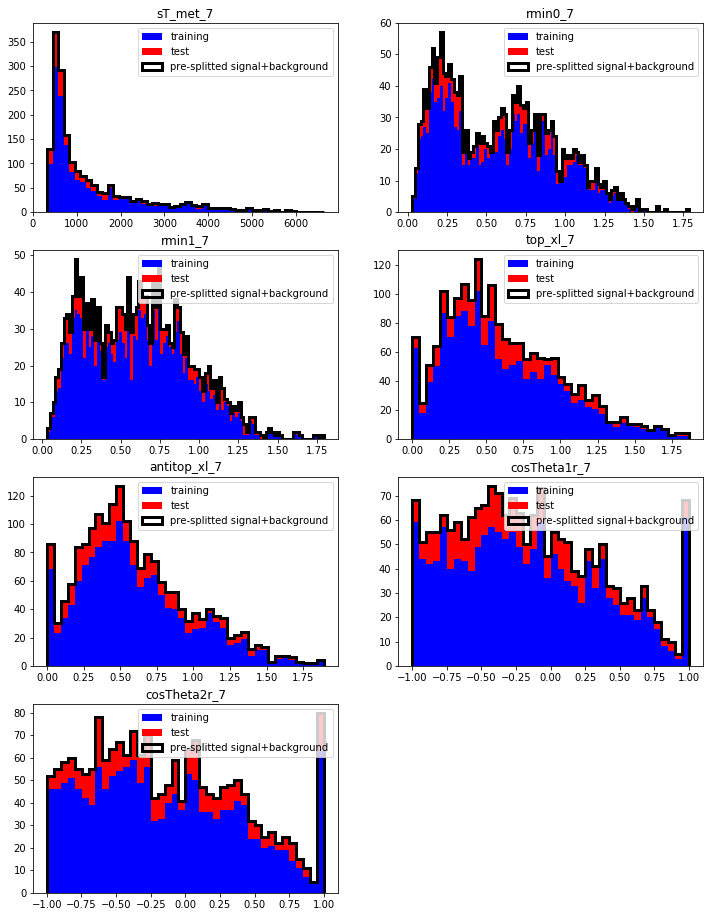

In [9]:
#print X_test.mean(axis=0) 
#print X_train.mean(axis=0) 
#print X.mean(axis=0) 
sample = {'training': 'blue', 'test': 'red'}

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,16))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)    
    bins=np.histogram(np.hstack((X_test[VARS[i]],X_train[VARS[i]])), 
                      bins = BINS[VARS[i]])[1]
    plt.hist([X_train[VARS[i]], X_test[VARS[i]]], bins, stacked=True,
    color = [sample['training'], sample['test']], label=['training', 'test'])
    plt.hist(X[VARS[i]], bins, histtype='step',edgecolor='black', linewidth=3,
             facecolor='none',label='pre-splitted signal+background')
    ax.legend(loc="upper right")
    plt.title(VARS[i])

plt.show()  

('scaling operator mean', array([ 1.32903019e+03,  5.80867158e-01,  6.05923572e-01,  6.02229955e-01,
        6.02340898e-01, -1.59622120e-01, -1.52589601e-01]))
[ 5.02191611e-17  9.57667724e-17 -5.48907110e-17  1.22628184e-16
 -1.05109872e-16 -2.56935243e-17  9.34309975e-18]
[ 0.0663485  -0.10494622  0.03997965  0.07614472 -0.03010521 -0.0539628
  0.08511867]
[ 0.01329063 -0.02102235  0.00800854  0.01525297 -0.00603054 -0.01080958
  0.01705059]
(1521, 7)


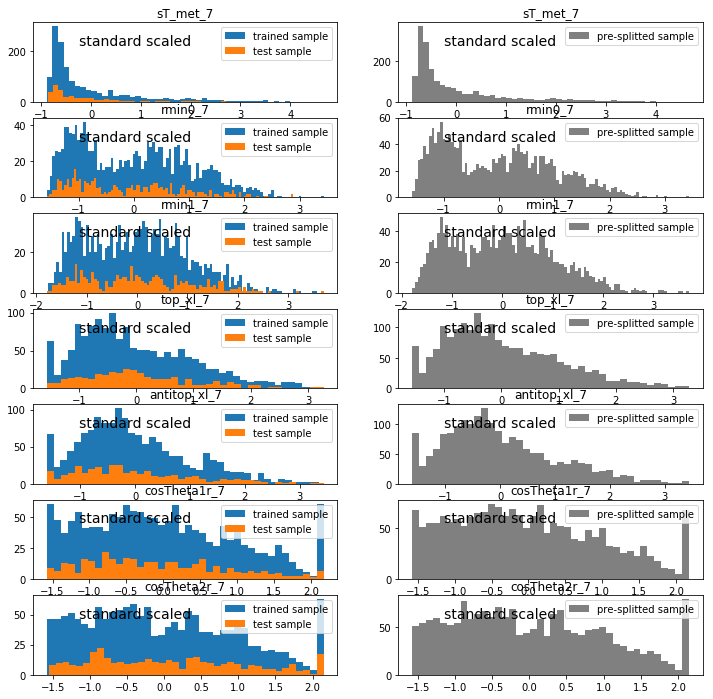

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load
from sklearn.externals import joblib

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("scaling operator mean" , scaler.mean_)

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

scaler_total = joblib.load(scaler_filename) 
X = scaler_total.transform(X)

print X_train.mean(axis=0) 
print X_test.mean(axis=0) 
print X.mean(axis=0) 

print X_train.shape

fig, ax = plt.subplots(int(len(VARS)), 2, figsize=(12,12))


for i in range(len(VARS)):
    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+1)
    plt.hist(X_train[:,i], bins=BINS[VARS[i]], label='trained sample')
    plt.hist(X_test[:,i], bins=BINS[VARS[i]],label='test sample')
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
    ax.legend(loc="upper right")

    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+2)
    plt.hist(X[:,i], bins=BINS[VARS[i]],color='grey',label='pre-splitted sample')
    ax.legend(loc="upper right")
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
plt.show()  


In [11]:

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)
# Train classifier
history_2l_2f = model_2l_2f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)

# Train classifier
history_2l_3f = model_2l_3f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)


# Train classifier
history_2l_4f = model_2l_4f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)

Text(0,0.5,'loss')

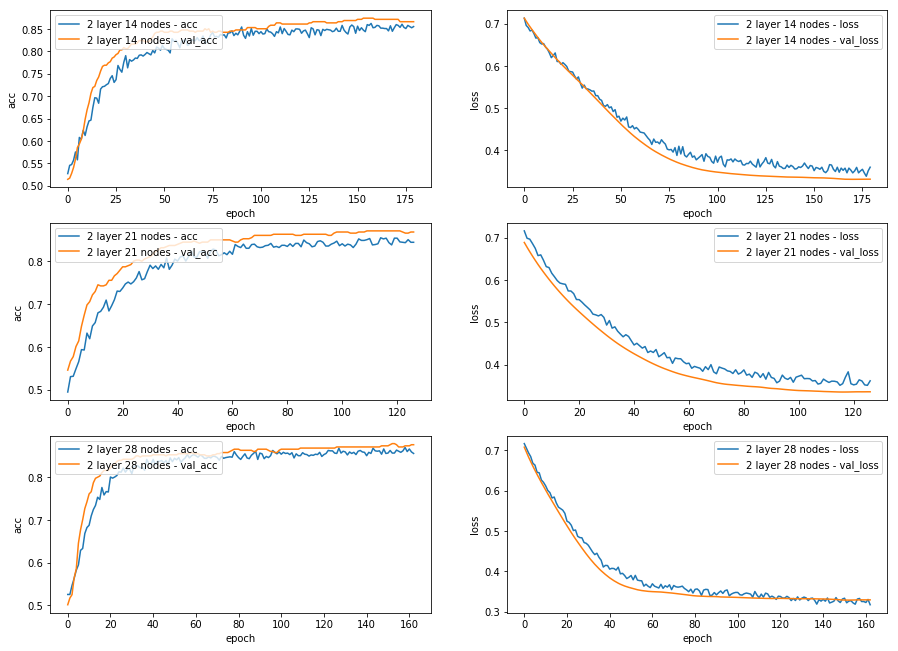

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15,15))

#MODEL 1
# plot accuracy vs epoch
ax = plt.subplot(4, 2, 1)
ax.plot(history_2l_2f.history['acc'], label='2 layer 14 nodes - acc')
ax.plot(history_2l_2f.history['val_acc'], label='2 layer 14 nodes - val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(4, 2, 2)
ax.plot(history_2l_2f.history['loss'], label='2 layer 14 nodes - loss')
ax.plot(history_2l_2f.history['val_loss'], label='2 layer 14 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


#MODEL 2
# plot accuracy vs epoch
ax = plt.subplot(4, 2, 3)
ax.plot(history_2l_3f.history['acc'], label='2 layer 21 nodes - acc')
ax.plot(history_2l_3f.history['val_acc'], label='2 layer 21 nodes - val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(4, 2, 4)
ax.plot(history_2l_3f.history['loss'], label='2 layer 21 nodes - loss')
ax.plot(history_2l_3f.history['val_loss'], label='2 layer 21 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


#MODEL 3
# plot accuracy vs epoch
ax = plt.subplot(4, 2, 5)
ax.plot(history_2l_4f.history['acc'], label='2 layer 28 nodes - acc')
ax.plot(history_2l_4f.history['val_acc'], label='2 layer 28 nodes - val_acc')
ax.legend(loc="upper left")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(4, 2, 6)
ax.plot(history_2l_4f.history['loss'], label='2 layer 28 nodes - loss')
ax.plot(history_2l_4f.history['val_loss'], label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')




Text(0,0.5,'loss')

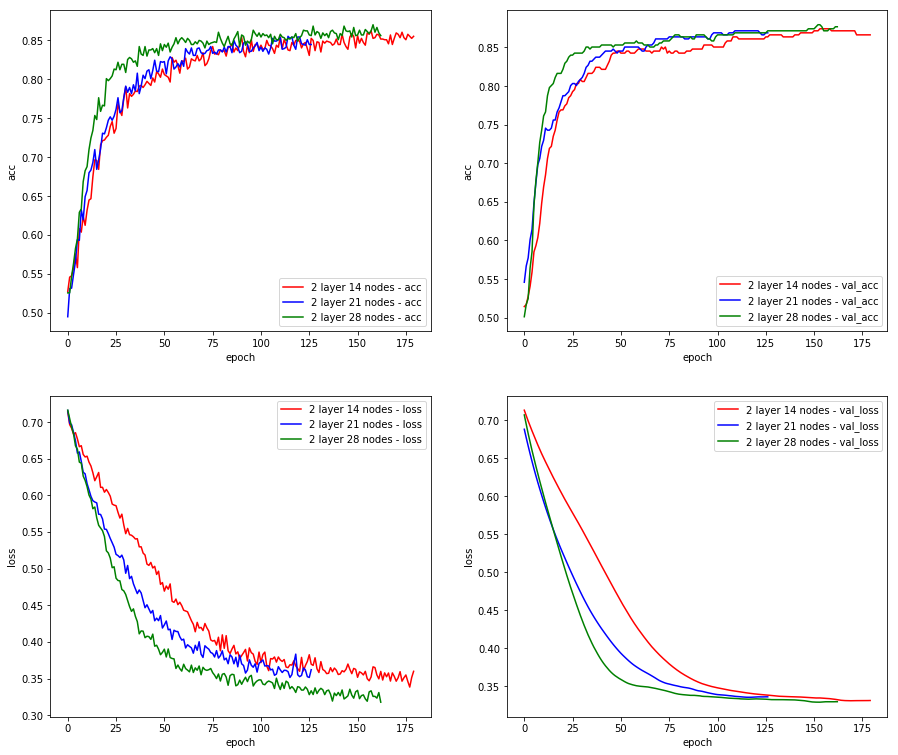

In [13]:
#COMPARING MODELS
plt.figure(figsize=(15,13))

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 1)
ax.plot(history_2l_2f.history['acc'], color = 'red', label='2 layer 14 nodes - acc')
ax.plot(history_2l_3f.history['acc'], color = 'blue', label='2 layer 21 nodes - acc')
ax.plot(history_2l_4f.history['acc'], color = 'green', label='2 layer 28 nodes - acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

ax = plt.subplot(2, 2, 2)
ax.plot(history_2l_2f.history['val_acc'], color = 'red', label='2 layer 14 nodes - val_acc')
ax.plot(history_2l_3f.history['val_acc'], color = 'blue', label='2 layer 21 nodes - val_acc')
ax.plot(history_2l_4f.history['val_acc'], color = 'green', label='2 layer 28 nodes - val_acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(2, 2, 3)
ax.plot(history_2l_2f.history['loss'], color = 'red', label='2 layer 14 nodes - loss')
ax.plot(history_2l_3f.history['loss'], color = 'blue', label='2 layer 21 nodes - loss')
ax.plot(history_2l_4f.history['loss'], color = 'green', label='2 layer 28 nodes - loss')
#ax.plot(history_2l_4f.history['val_loss'], label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


# plot loss vs epoch
ax = plt.subplot(2, 2, 4)
ax.plot(history_2l_2f.history['val_loss'], color = 'red', label='2 layer 14 nodes - val_loss')
ax.plot(history_2l_3f.history['val_loss'], color = 'blue', label='2 layer 21 nodes - val_loss')
ax.plot(history_2l_4f.history['val_loss'], color = 'green', label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

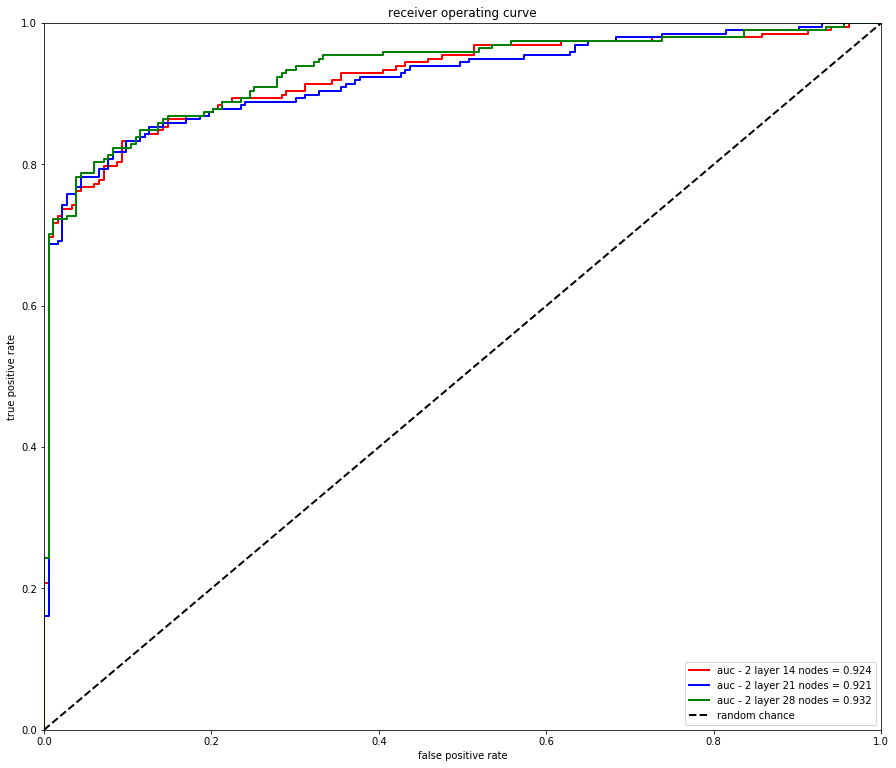

In [14]:
plt.figure(figsize=(15,13))

# Plot ROC
from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f = model_2l_2f.predict(X_test)
Y_predict_2l_3f = model_2l_3f.predict(X_test)
Y_predict_2l_4f = model_2l_4f.predict(X_test)
fpr_2l_2f, tpr_2l_2f, thresholds_2l_2f = roc_curve(Y_test, Y_predict_2l_2f)
fpr_2l_3f, tpr_2l_3f, thresholds_2l_3f = roc_curve(Y_test, Y_predict_2l_3f)
fpr_2l_4f, tpr_2l_4f, thresholds_2l_4f = roc_curve(Y_test, Y_predict_2l_4f)


roc_auc_2l_2f = auc(fpr_2l_2f, tpr_2l_2f)
roc_auc_2l_3f = auc(fpr_2l_3f, tpr_2l_3f)
roc_auc_2l_4f = auc(fpr_2l_4f, tpr_2l_4f)


ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f, tpr_2l_2f, lw=2, color='red', label='auc - 2 layer 14 nodes = %.3f' 
        % (roc_auc_2l_2f))
ax.plot(fpr_2l_3f, tpr_2l_3f, lw=2, color='blue', label='auc - 2 layer 21 nodes = %.3f' 
        % (roc_auc_2l_3f))
ax.plot(fpr_2l_4f, tpr_2l_4f, lw=2, color='green', label='auc - 2 layer 28 nodes = %.3f' 
        % (roc_auc_2l_4f))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve')
ax.legend(loc="lower right")



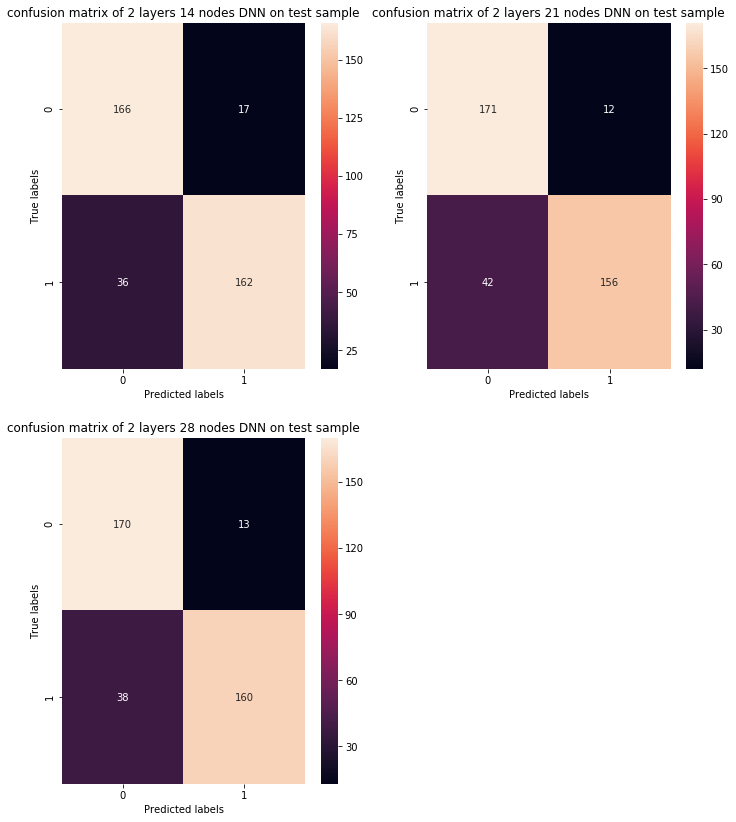

[[166  17]
 [ 36 162]]
[[171  12]
 [ 42 156]]
[[170  13]
 [ 38 160]]


'\n# Example of a confusion matrix in Python\nfrom sklearn.metrics import confusion_matrix\n \nexpected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]\npredicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]\nresults = confusion_matrix(expected, predicted)\nprint(results)\n\n[[4 2]\n[1 3]]\n'

In [15]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12,14))
fig.delaxes(ax[1,1])
    
matrix_2l_2f = confusion_matrix(Y_test, Y_predict_2l_2f.round())
matrix_2l_3f = confusion_matrix(Y_test, Y_predict_2l_3f.round())
matrix_2l_4f = confusion_matrix(Y_test, Y_predict_2l_4f.round())



ax = plt.subplot(2, 2, 1)
sns.heatmap(matrix_2l_2f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 14 nodes DNN on test sample'); 



ax = plt.subplot(2, 2, 2)
sns.heatmap(matrix_2l_3f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 21 nodes DNN on test sample'); 


ax = plt.subplot(2, 2, 3)
sns.heatmap(matrix_2l_4f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 28 nodes DNN on test sample'); 
plt.show()
print matrix_2l_2f
print matrix_2l_3f
print matrix_2l_4f
'''
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
[1 3]]
'''

# evaluate the model
#model.evaluate(X_test, Y_test, verbose=0)

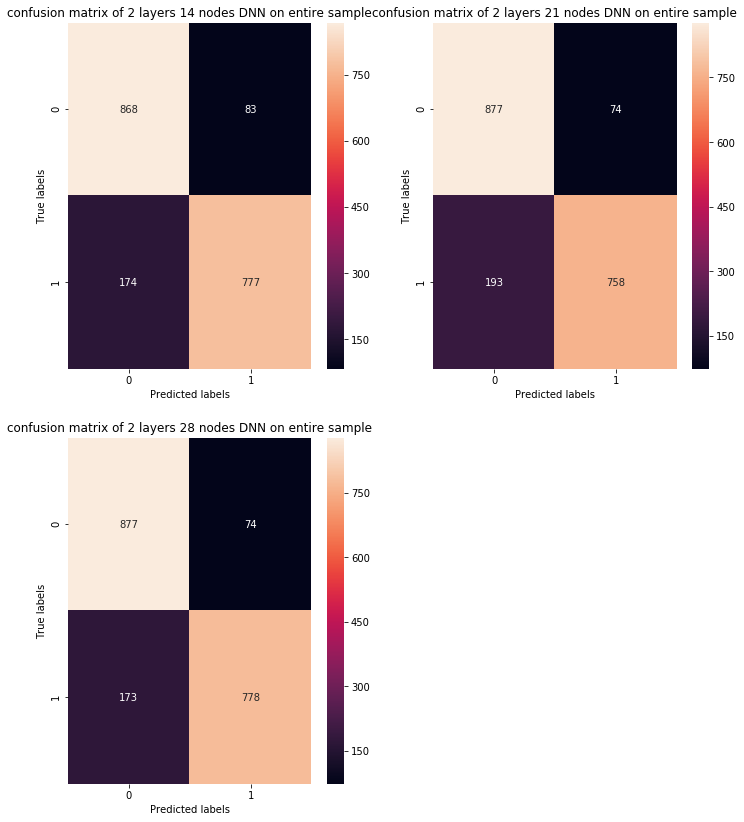

In [16]:
df_all['model_2l_2f_predicted'] = model_2l_2f.predict(X) # add prediction to array
df_all['model_2l_3f_predicted'] = model_2l_3f.predict(X) # add prediction to array
df_all['model_2l_4f_predicted'] = model_2l_4f.predict(X) # add prediction to array


all_matrix_2l_2f = confusion_matrix(df_all['label'], df_all['model_2l_2f_predicted'].round())
all_matrix_2l_3f = confusion_matrix(df_all['label'], df_all['model_2l_3f_predicted'].round())
all_matrix_2l_4f = confusion_matrix(df_all['label'], df_all['model_2l_4f_predicted'].round())

fig, ax = plt.subplots(2, 2, figsize=(12,14))
fig.delaxes(ax[1,1])

ax = plt.subplot(2, 2, 1)
sns.heatmap(all_matrix_2l_2f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 14 nodes DNN on entire sample');

ax = plt.subplot(2, 2, 2)
sns.heatmap(all_matrix_2l_3f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 21 nodes DNN on entire sample');

ax = plt.subplot(2, 2, 3)
sns.heatmap(all_matrix_2l_4f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 28 nodes DNN on entire sample');

In [17]:
from matplotlib import cm

print df_all.iloc[:5]


      sT_met_7   rmin0_7   rmin1_7  top_xl_7  antitop_xl_7  cosTheta1r_7  \
0  1128.375321  0.969716  0.545491  1.044474      0.560998     -0.571695   
1  2255.147924  0.215043  0.113367  1.085687      0.778311     -0.866645   
2  1791.428980  0.297704  0.890915  0.157373      0.000801      0.241220   
3  3372.151883  0.138865  0.278163  0.289029      1.003450      0.479754   
4  1352.604606  0.164439  0.651367  1.866663      1.075753     -0.994473   

   cosTheta2r_7  label  model_2l_2f_predicted  model_2l_3f_predicted  \
0     -0.972961    1.0               0.268672               0.130147   
1     -0.944383    1.0               0.983265               0.986340   
2      0.999133    1.0               0.754486               0.711530   
3     -0.481650    1.0               0.983312               0.997711   
4     -0.578979    1.0               0.595401               0.684011   

   model_2l_4f_predicted  
0               0.216727  
1               0.997669  
2               0.816808  
3 

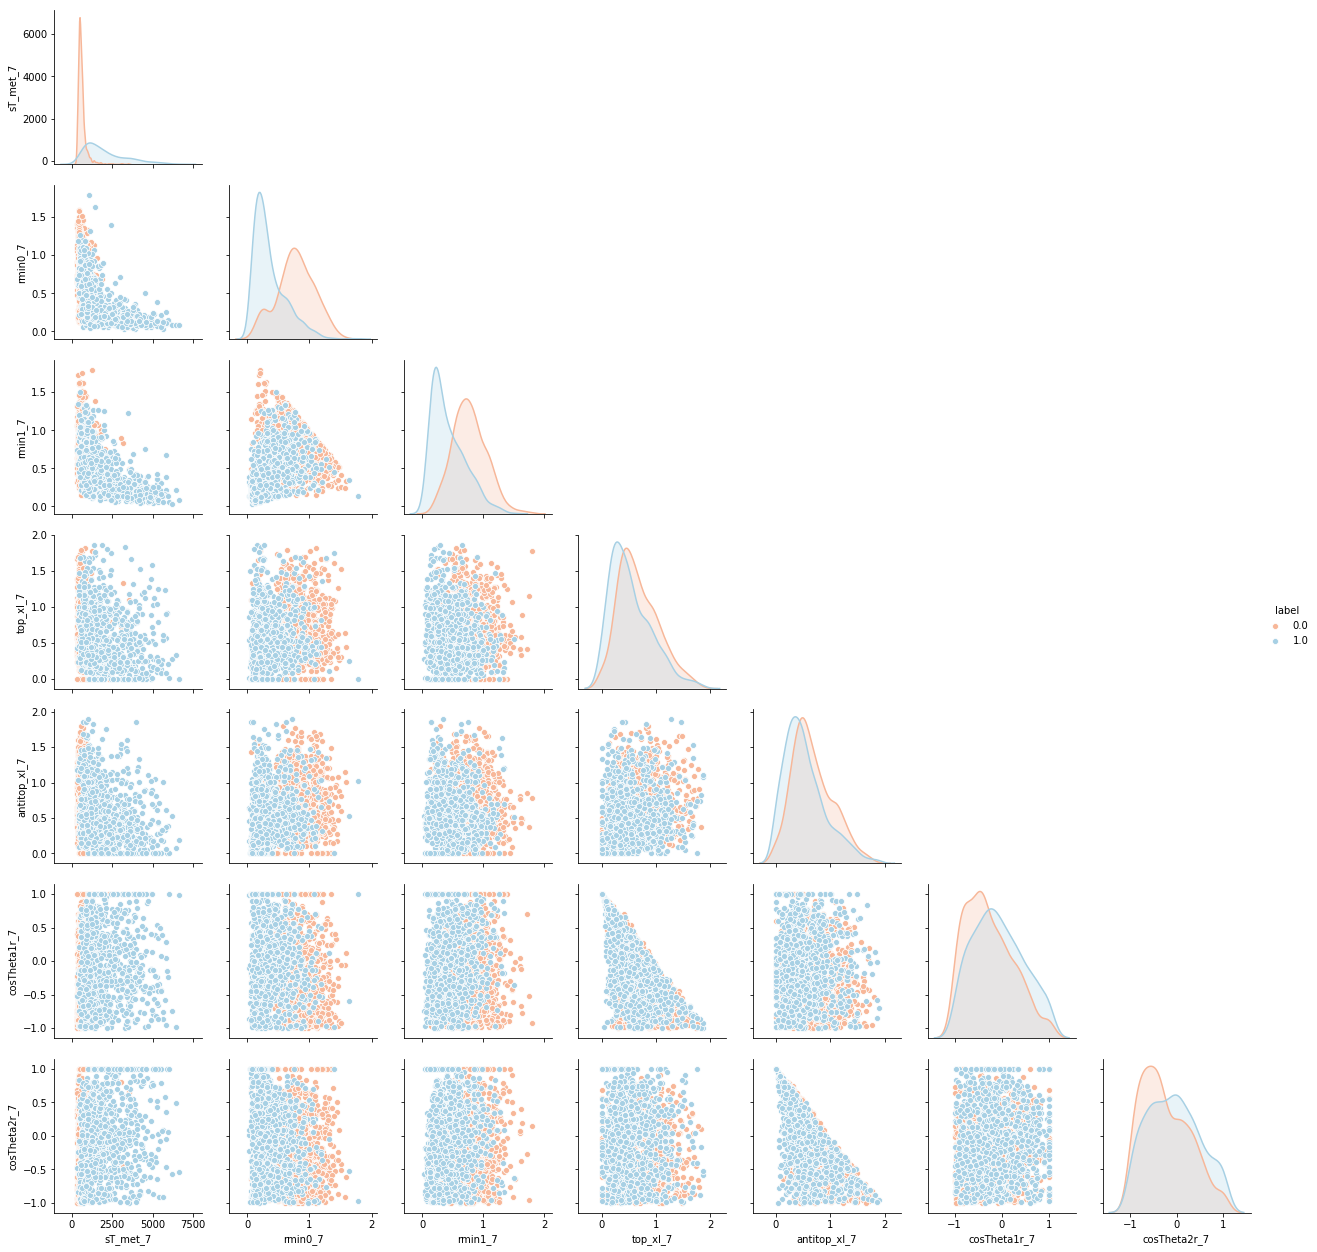

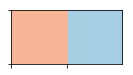

In [18]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
#sns.color_palette("hls", 8)
palette = sns.color_palette("RdBu",n_colors=2)
sns.set_palette(palette)
g = sns.pairplot(df_all, x_vars=VARS, y_vars=VARS, hue="label")
sns.palplot(palette)
g.map_upper(hide_current_axis)


/usr/local/bin/start_ipykernel.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab2824c850>,
      dtype=object)

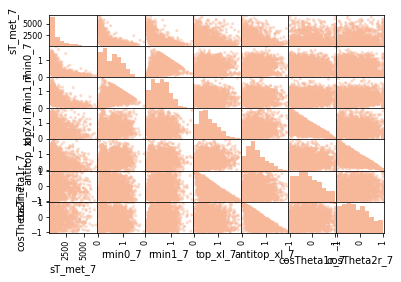

In [20]:
from pandas.plotting import scatter_matrix
pd.scatter_matrix(df_all[VARS])

